In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from PIL import Image
import matplotlib as mpl
from PIL import ImageOps
import matplotlib.patches as patches

from sklearn.linear_model import LogisticRegression,LinearRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import time

---
#### Fetch Original MNIST Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, version=1)
X, y = mnist["data"], mnist["target"]
X = np.array(X)

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

---
#### Select Model Algorithm by using Orignal MNIST

In [4]:
# Logistic Regression 모델 (100)
start_time = time.time()
log_reg = LogisticRegression(max_iter=100, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression Training Time: {end_time - start_time} seconds")

Logistic Regression Accuracy: 0.9255
Logistic Regression Training Time: 17.669995307922363 seconds


C:\Users\user\anaconda3\envs\koreait2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Logistic Regression 모델 (500)
start_time = time.time()
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression Training Time: {end_time - start_time} seconds")

Logistic Regression Accuracy: 0.9224
Logistic Regression Training Time: 73.51286792755127 seconds


C:\Users\user\anaconda3\envs\koreait2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# Softmax 모델 (100)
start_time = time.time()
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                 random_state=42, max_iter=100)
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Softmax Regression Accuracy: {accuracy}")
print(f"Softmax Regression Training Time: {end_time - start_time} seconds")

Softmax Regression Accuracy: 0.9255
Softmax Regression Training Time: 15.181423664093018 seconds


C:\Users\user\anaconda3\envs\koreait2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Softmax 모델 (500)
start_time = time.time()
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500,
                                random_state=42)
softmax_reg.fit(X_train, y_train)
y_pred = softmax_reg.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Softmax Regression Accuracy: {accuracy}")
print(f"Softmax Regression Training Time: {end_time - start_time} seconds")

Softmax Regression Accuracy: 0.9224
Softmax Regression Training Time: 84.61861801147461 seconds


C:\Users\user\anaconda3\envs\koreait2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Random Forests 모델
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Training Time: {end_time - start_time} seconds")

Random Forest Accuracy: 0.9705
Random Forest Training Time: 64.87907552719116 seconds


In [9]:
# Extra-tree 모델
start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.9722
Extra Trees Training Time: 50.64269971847534 seconds


In [10]:
# MLP Classifier 모델
start_time = time.time()
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"MLPClassifier Accuracy: {accuracy}")
print(f"MLPClassifier Training Time: {end_time - start_time} seconds")

MLPClassifier Accuracy: 0.9634
MLPClassifier Training Time: 173.18463730812073 seconds


In [11]:
# Voting Classifier 모델
start_time = time.time()
vot_clf = VotingClassifier([('log_reg', LogisticRegression(max_iter=500, random_state=42)), ('softmax_reg', LogisticRegression(multi_class="multinomial", solver="lbfgs",random_state=42, max_iter=100)), ('rf_clf', RandomForestClassifier(n_estimators=100, random_state=42)), ('mlp_clf', MLPClassifier(random_state=42)), ('sgd_reg', SGDClassifier(random_state=42))], voting='hard')
vot_clf.fit(X_train, y_train)
y_pred = vot_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"MLPClassifier Accuracy: {accuracy}")
print(f"MLPClassifier Training Time: {end_time - start_time} seconds")

C:\Users\user\anaconda3\envs\koreait2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\envs\koreait2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

MLPClassifier Accuracy: 0.9447
MLPClassifier Training Time: 458.29047179222107 seconds


In [12]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test,y_pred)
print(f"knn clf Accuracy: {accuracy}")
print(f"knn clf Training Time: {end_time - start_time} seconds")

knn clf Accuracy: 0.9705
knn clf Training Time: 21.88560914993286 seconds


---
#### Fetch Handmade Test Dataset (100개)

In [13]:
IMAGE_TEST = "./mnist_data_new.npz"
h_test = np.load(IMAGE_TEST)
h_t_digit = h_test['img']
h_t_label = h_test['label']
h_t_label = h_t_label.astype(str)
print(f'shape : {h_t_digit.shape}')

shape : (100, 28, 28)


---
#### Compare test accuray (Original test data vs Handmade test data)
model -> Extra trees

In [14]:
# original 학습 , handmade test
start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(h_t_digit.reshape(-1, 784))
end_time = time.time()
accuracy = accuracy_score(h_t_label, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.1
Extra Trees Training Time: 48.671993017196655 seconds


In [15]:
# original 학습 , original test
start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")


Extra Trees Accuracy: 0.9722
Extra Trees Training Time: 48.788575410842896 seconds


---
#### Compare HM data vs MNIST data

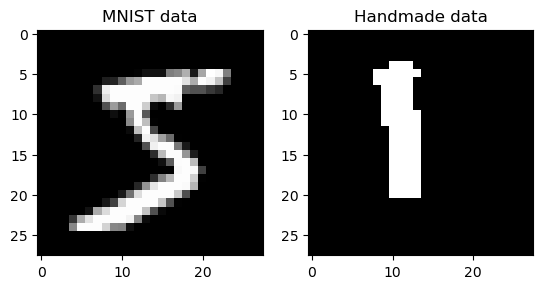

In [16]:
# MNIST data와 hand made data를 이미지를 plot해서 확인하고 pixel 값을 출력해서 어떤 차이가 있는 지 비교한다. 
X_show = X_train[0].reshape(28, 28)
plt.subplot(1,2,1)
plt.imshow(X_show, cmap='gray')
plt.title('MNIST data')

plt.subplot(1,2,2)
plt.imshow(h_t_digit[11], cmap='gray')
plt.title('Handmade data')

plt.show()

In [17]:
# pixel data를 일부 출력해서 확인한다.
print(f'MNIST : {X_show[10]}')
print(f'HM : {h_t_digit[0][10]}')

MNIST : [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
HM : [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


---
#### Data processing
All data must be centered
HM -> center processing
1. HM data -> add noise
2. MNIST data -> binarize
3. Compare test accuracy above 2 case

Centering HM data

In [18]:
# center image function
def center_image(selected_image):
    # 이미지의 높이, 너비 계산
    height, width = selected_image.shape
    
    nonzero_indices = np.argwhere(selected_image > 0)  # 흰색(숫자) 부분의 인덱스 찾기
    if not nonzero_indices.shape[0]:
        return selected_image
            
    top_row, left_col = nonzero_indices.min(axis=0)
    bottom_row, right_col = nonzero_indices.max(axis=0)
    
    selected_image[top_row:bottom_row + 1, left_col] = 0  # 왼쪽 세로 테두리
    selected_image[top_row:bottom_row + 1, right_col] = 0  # 오른쪽 세로 테두리
    selected_image[top_row, left_col:right_col + 1] = 0  # 위쪽 가로 테두리
    selected_image[bottom_row, left_col:right_col + 1] = 0  # 아래쪽 가로 테두리

    
    # 흰색(숫자) 부분을 따내기 위해 흰색인 부분의 인덱스 찾기
    nonzero_indices = np.argwhere(selected_image > 0)  # 흰색(숫자) 부분의 인덱스 찾기
    if not nonzero_indices.shape[0]:
        return selected_image
    top_row, left_col = nonzero_indices.min(axis=0)
    bottom_row, right_col = nonzero_indices.max(axis=0)
    

    # 흰색(숫자) 영역의 높이, 너비 계산
    white_height = bottom_row - top_row + 1
    white_width = right_col - left_col + 1

    # 중앙에 위치시키기 위한 offset 계산
    offset_h = (height - white_height) // 2
    offset_w = (width - white_width) // 2

    # 새로운 이미지 생성하고 이미지를 중앙에 위치시키기
    new_image = np.zeros((height, width))
    new_image[offset_h:offset_h + white_height, offset_w:offset_w + white_width] = \
        selected_image[top_row:bottom_row + 1, left_col:right_col + 1]

    return new_image


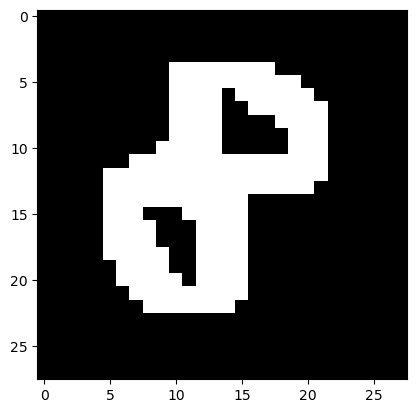

In [19]:
h_t_center = []
for image in h_t_digit:
    h_t_center.append(center_image(image))
    
h_t_center = np.array(h_t_center)
plt.imshow(h_t_center[8], cmap='gray')

1. HM data -> add noise

In [20]:
# handmade dataset에 gaussian blur를 추가할 함수들
def gauss1d(sigma):
    length = math.ceil(sigma * 6)
    if length % 2 == 0: length += 1
    kernel = np.arange(-(length // 2), (length // 2) + 1, dtype=np.float32)
    kernel = np.vectorize(lambda x: np.exp(-(x ** 2) / (2 * sigma ** 2)))(kernel)
    kernel = kernel / np.sum(kernel)
    return kernel

def gauss2d(sigma):
    kernel1d = gauss1d(sigma)
    kernel2d = np.outer(kernel1d, kernel1d.T)
    kernel2d = kernel2d / np.sum(kernel2d)
    return kernel2d

def convolved2d(array, filter):
  a = int((len(filter)-1)/2)
  img_pad = np.pad(array,((a,a),(a,a)), 'constant')

  rotate_gauss = np.rot90(filter)
  ratate_gauss = np.rot90(rotate_gauss)

  result_img = np.ones((len(array), len(array[0])))
  result_img = result_img.astype('float32')

  for i in range(len(result_img)):
    for j in range(len(result_img[0])):
      result_img[i][j] = np.sum(img_pad[i:i+len(filter), j:j+len(filter)]*rotate_gauss)

  return result_img

(100, 28, 28)


Text(0.5, 1.0, 'Handmade data')

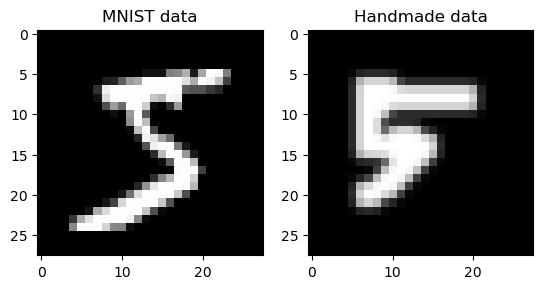

In [21]:
# Add gaussian noise
blur_img = []
gaussian_fil = gauss2d(0.6)
for sample in (h_t_center*255):
    blur_img.append(convolved2d(sample, gaussian_fil))
blur_img = np.array(blur_img)
blur_img = blur_img.astype(np.int64)
print(blur_img.shape)
plt.subplot(1,2,1)
plt.imshow(X_show, cmap='gray')
plt.title('MNIST data')

plt.subplot(1,2,2)
plt.imshow(blur_img[5], cmap='gray')
plt.title('Handmade data')

2. MNIST data -> binarize

(-0.5, 27.5, 27.5, -0.5)

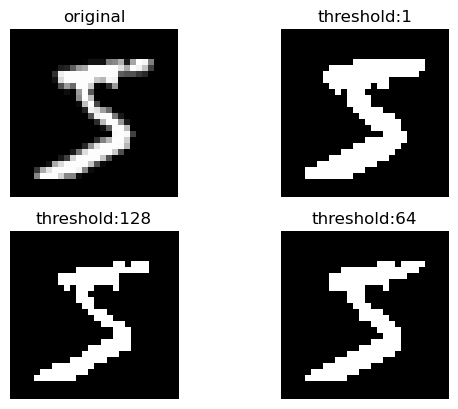

In [22]:
# 이진화 처리
threshold = 1
X_binary_1 = (X > threshold).astype(int)

A = X[0].reshape((28,28))
B = X_binary_1[0].reshape((28,28))

threshold = 128
X_binary_128 = (X > threshold).astype(int)
C = X_binary_128[0].reshape((28,28))

X_binary_64 = (X > 64).astype(int)
D = X_binary_64[0].reshape((28,28))

# Treshold 값을 달리했을 때 이미지 이진화 결과의 변화를 나타냄
plt.subplot(2,2,1)
plt.imshow(A, cmap='gray')
plt.title("original")
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(B, cmap='gray')
plt.title("threshold:1")
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(C, cmap='gray')
plt.title("threshold:128")
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(D, cmap='gray')
plt.title("threshold:64")
plt.axis('off')

3. Compare test accuracy above 2 case </br>
model -> Extra tree

In [23]:
# add noise to hand made test data
start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(blur_img.reshape(-1,784))
end_time = time.time()
accuracy = accuracy_score(h_t_label, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.51
Extra Trees Training Time: 48.01428771018982 seconds


In [24]:
# MNIST binarize
X_binary_train = X_binary_64[:60000]

start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_binary_train, y_train)
y_pred = et_clf.predict((h_t_center).reshape(-1, 784))
end_time = time.time()
accuracy = accuracy_score(h_t_label, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")


Extra Trees Accuracy: 0.53
Extra Trees Training Time: 44.56151366233826 seconds


MNST를 Binarize했을 때 성능이 더 좋다.

---
#### Fetch Handmade Dataset

In [25]:
# dataset 불러오기
# 경로는 필요에 맞게 변경 필요
IMAGE_PATH_DIGIT_TRAIN = "C:/Users/user/Downloads/digit_data_TrVal-1.npz"
IMAGE_PATH_DIGIT_TEST = "C:/Users/user/Downloads/digit_data_10_Test_1.npz"
IMAGE_PATH_OP_TRAIN = "C:/Users/user/Downloads/op_data_TrVal-1.npz"
IMAGE_PATH_OP_TEST = "C:/Users/user/Downloads/op_data_10_Test_1.npz"

hm_digit_train = np.load(IMAGE_PATH_DIGIT_TRAIN)
hm_digit_test = np.load(IMAGE_PATH_DIGIT_TEST)
hm_op_train = np.load(IMAGE_PATH_OP_TRAIN)
hm_op_test = np.load(IMAGE_PATH_OP_TEST)

# 숫자 data img, label 분리 ==> train data
hm_digit_train_data = hm_digit_train['img']
hm_digit_train_label = hm_digit_train['label']

# 숫자 data img, label 분리 ==> test data
hm_digit_test_data = hm_digit_test['img']
hm_digit_test_label = hm_digit_test['label']

# 기호 data img, label 분리 ==> train data
hm_op_train_data = hm_op_train['img']
hm_op_train_label = hm_op_train['label']

# 기호 data img, label 분리 ==> test data
hm_op_test_data = hm_op_test['img']
hm_op_test_label = hm_op_test['label']

In [26]:
# 받아온 데이터의 형태 출력
print(f'digit train : {hm_digit_train_data.shape}')
print(f'digit test : {hm_digit_test_data.shape}')
print(f'op train : {hm_op_train_data.shape}')
print(f'op test : {hm_op_test_data.shape}')

digit train : (15119, 28, 28)
digit test : (2160, 28, 28)
op train : (15329, 28, 28)
op test : (2190, 28, 28)


---
#### Data Cleaning
1. Change wrong label & delete messy data
2. Create CenterScaler class : Centering image
3. Create PixelScaler class : Binarize original MNIST</br>
    3-1. Verification of scaler pipeline
4. Verification of data cleaning

1. Change wrong label & delete messy data

In [27]:
# digit data wrong label


# 데이터셋 레이블
digit_TrVal_img = hm_digit_train['img']
digit_TrVal_label = hm_digit_train['label']

# 파트별로 변경할 레이블 값 (안에 레이블 넣어주면됨)
part_changes = {
    0: [15046,14191,13816,13765,13311,13244,13180,13167,13028,12487,12715,12728,12288,12026,11954,11593,11536,11466,11119,11106,10855,10454,9535,9641,9294,8648,8202,130, 416, 462, 1115, 1201, 1407, 1530, 2262, 2688, 2797, 
        3506, 3535, 4157, 4907, 5090, 5184, 5389, 5403, 5997, 6243, 6301, 
        6592, 6825, 7098],
    1: [14807,14567,13929,13764,13511,13010,12895,12555,12517,12434,11974,11971,11536,10854,9376,8618,8675,8709,8797,8342,395, 484, 614, 759, 1014, 1052, 1465, 1582, 1861, 2597, 2655,
        2944, 3078, 3331, 3466, 3513, 4069, 4322, 4409, 4603, 4949, 5353,
        6118, 6701, 7268],
    2: [15051,14908,14446,14000,14177,14329,13107,12286,11434,11130,11025,10964,10963,10907,10604,10289,10402,9531,9474,8349,7883,7862,7785,885, 928, 1131, 1415, 2331, 2409, 2741, 2851, 2857, 2939, 3342, 3454, 
        3507, 4067, 4383, 4582, 4880, 5176, 5356, 5399,5437, 5729, 5965, 6342, 6360,
        6762, 7078, 7277, 7403, 7472, 7639],
    3: [7981,7889,8763,9488,10413,10767,10841,11311,11998,11997,11982,12725,12876,13260,14341,209, 519, 729, 815, 835, 1045, 1343, 1800, 2377, 2645, 2976, 4543,
        4658, 5207, 5842, 5888, 6173, 6759, 6853, 7140, 7253, 7350, 7517, 7586],
    4: [13784,13813,13935,14178,13616,13558,13174,12201,12197,11371,11918,11228,10050,10382,9625,8653,8710,8368,178, 363, 382, 1436, 1502, 2030, 2119, 2494, 5215, 2757, 3622, 3693, 4097,
        4223, 4249, 4331, 4597, 5024, 5029, 5127, 5480, 6120, 6499, 6753, 7041, 7598],
    5: [8657,8753,9681,9834,9871,10309,10833,10850,11242,11904,11916,13682,14288,15081,14571,51, 969, 999, 1113, 1341, 1371, 1830, 1832, 1838, 2463, 2465, 2492, 2630,2754,
        2761, 3076, 3694, 3795, 3817, 3852, 4138, 4202, 4210, 4211, 4509, 5328, 5498,
        5674, 6154, 6551, 6896, 7060, 7070, 7252],
    6: [374, 571, 604, 676, 858, 1236, 1368, 1380, 1503, 1544, 2158, 2457, 2484, 2972,
        3164, 4127, 4482, 4551, 5002, 5301, 5853, 5906, 5909, 6026, 6388, 6775, 6990,
        7286,7652, 13077,12930,12604,12763,11973,11706,11603,11392,11198,10795,9652,10393,9628,9649,8489,8866,9014],
    7: [9482,9489,11031,11451,11979,12346,12359,12686,12998,14072,14394,14718,546, 915, 968, 1447, 1487, 1749, 2110, 2159, 2180, 2220, 2269, 2428, 2756,
        2819, 3194, 3414, 3717, 4065, 4209, 4362, 5162, 5294, 5295, 5488, 5613, 5967,
        5969, 6184, 6264, 6343, 6819, 6823],
    8: [15095,14275,13450,13425,12411,12454,12886,12085,11991,11237,11428,11735,9718,9791,9953,9958,9985,10368,9473,9237,8852,8654,9627,93, 755, 1066, 1143, 1264, 1796, 2310, 2836, 3032, 3209, 3289, 3417, 3424,
        3768, 4302, 4404, 4408, 5105, 5347, 5436, 6287, 6758, 7193, 7483],
    9: [8288,8305,8670,8694,9222,9262,9637,10135,10365,11182,12393,12501,12810,13018,13654,14902,15045,69, 181, 406, 819, 989, 1576, 1753, 2916, 3065, 3070, 3118, 3174, 3975, 
        3990, 4304, 4997, 5150, 5192, 5227, 5521, 5933, 6372, 6584, 6631, 6801, 7010,
        7175, 7209, 7618]
}

indices_to_delete = [12910,12017,11805,8365,1518, 4272, 5270,3749, 6526, 6841,7516]  # 삭제할 인덱스 목록



# 변경된 결과 확인
for part, indices in part_changes.items():
    new_label_value = part
    for index in indices:
        digit_TrVal_label[index] = new_label_value
        #print(f"Index {index}: New Label - {new_label_value}")

# 선택된 인덱스를 제외한 데이터 및 레이블 생성
digit_TrVal_img = np.delete(digit_TrVal_img, indices_to_delete, axis=0)
digit_TrVal_label = np.delete(digit_TrVal_label, indices_to_delete)        
        
print(f"Deleted indices: {indices_to_delete}")

# 변경된 레이블을 저장
np.savez('./number_cln.npz', img=digit_TrVal_img, label=digit_TrVal_label)

Deleted indices: [12910, 12017, 11805, 8365, 1518, 4272, 5270, 3749, 6526, 6841, 7516]


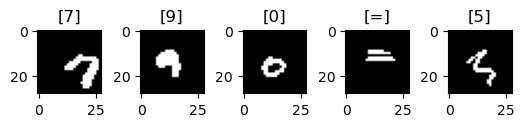

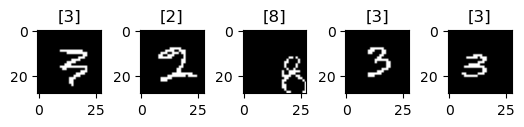

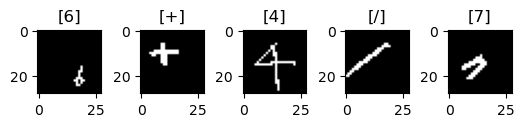

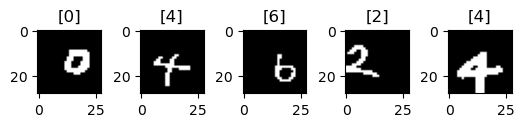

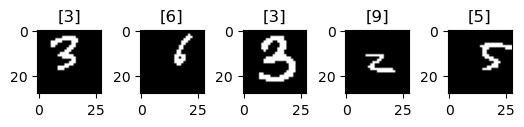

In [28]:
# label이 잘못된 숫자 data 분석
num_c=5
num_r=5
for i in range(num_r):
    for j in range(num_c):
            
        plt.subplot(5, 5, j+1)
        plt.imshow(digit_TrVal_img[i*num_c+j],cmap='gray')
        plt.title(f'[{digit_TrVal_label[i*num_c+j]}]')
    plt.show()

In [29]:
correct_digit_label = np.arange(0,10,1)
correct_digit_label = list(map(str,correct_digit_label))
digit_mask=[]
for wrong_label in digit_TrVal_label:
    if wrong_label not in correct_digit_label:
        digit_mask.append(False)
    else:
        digit_mask.append(True)

digit_mask = np.array(digit_mask)

pure_number = digit_TrVal_img[digit_mask]
pure_number_label = digit_TrVal_label[digit_mask]

np.savez('./pure_number.npz',img=pure_number,label=pure_number_label)

In [30]:
# op data wrong label



# 데이터셋 레이블
op_TrVal_img = hm_op_train['img']
op_TrVal_label = hm_op_train['label']


# 파트별로 변경할 레이블 값 (안에 레이블 넣어주면됨)
part_changes = {
'+':[54,47,55,97,154,233,316,577,647,670,717,721,729,787,941,1219,1602,1665,1715,1774,1792,1902,1920,2439,2547,2625,
     2714,2797,2966,3012,3082,3097,3112,3245,3329,3397,3425,3598,3590,3656,3783,3853, 4085, 4230, 4273, 4394, 4423,
     4492, 4496, 4516, 4651, 4670, 4684, 4697, 4770, 4811, 4892, 4994, 5093, 5193, 5220, 5231, 5272, 5453, 5495,
     5503, 5748, 5835, 5951, 6023, 6047, 6088, 6136, 6163, 6166, 6422, 6586, 6664, 6883, 6947, 6994, 7026, 7045, 
     7066, 7139, 7309, 7528,7833,8335,8556,8636,8732,8838,8881,8954,8992,9088,9424,9697,10195,10279,10428,10602,
     10619,10700,11085,11087,11574, 11586, 11807, 11823, 12087, 12169, 12190, 12281, 12337, 12386, 12434, 12545,
     12558, 12596, 13155, 13261, 13384, 13575, 13635, 13647, 13662, 13679, 13782, 13997, 14059, 14393, 14426, 14779,
     14784, 14824, 14859, 14986, 15184, 15257, 15312, 15315],

'-':[72,95,280,389,416,461,474,494,720,1142,1314,1385,1400,1551,1636,1641,1690,1752,1812,1816,1880,2179,2210,2275,
     2332,2489,2570,2625,2657,2886,3116,3575,3285,3301,3449,3471,3478,3704,3715,3728,3745,3761,3833, 3834, 3891,
     4025, 4033, 4124, 4165, 4299, 4330, 4369, 4377, 4393, 4636, 4668, 4726, 4776, 4796, 4806, 4894, 4978, 5076,
     5221, 5230, 5244, 5299, 5472, 5578, 5619, 5741, 5774, 5965, 6021, 6053, 6098, 6132, 6223, 6227, 6246, 6387,
     6508, 6562, 6620, 6674, 6825, 6875, 6913, 6991, 7027, 7093, 7122, 7247, 7251, 7288, 7381, 7437, 7465,8041,
     8247,8455,8457,8505,9033,9049,9131,9283,9746,9763,9845,9868,10321,10493,10535,10797,10806,10999,11312,11475,
     11562, 11709, 11874, 11882, 12007, 12139, 12635, 12739, 12751, 12958, 12998, 13026, 13817, 13999, 14019, 14125,
     14375, 14503, 14561, 14682, 15140, 15160],

'x':[197,257,299,375,420,736,889,920,979,1056,1074,1766,1791,1795,1958,1999,2000,2341,2402,2447,2498,2546,2587,2773,
     2800,2877,3115,3362,3456,3687,3816,2,27,33,36,82,113,203,290,292,293,323,327,382,400,411,428,437,454,471,532,
     539,568,574,618,669,680,700,720,748,760,777,792,800,814,849,850,863,879,920,982,1012,1067,1122,1158,1161,1209,
     1223,1258,1265,1272,1276,1287,1298,1322,1330,1335,1478,1493,1532,1573,1609,1637,1681,1692,1730,1734,1744,1767,
     1858,1957,2005,2009,2018,2109,2112,2117,2127,2133,2157,2168,2208,2212,2266,2279,2281,2286,2316,2344,2356,2360,
     2410,2417,2437,2517,2581,2603,2629,2665,2681,2723,2734,2738,2746,2845,2931,2938,2980,2985,2991,3094,3101,3111,
     3237,3250,3252,3264,3271,3272,3310,3315,3321,3328,3330,3332,3343,3447,3462,3474,3494,3496,3521,3522,3548,3572,
     3594,3611,3627,3638,3681,3698,3711,3740,3756,3759,69,132,329,588,686,719,735,758,762,927,1057,1125,1208,1728,
     1751,2028,2072,2093,2129,2170,2181,2438,2501,2551,2690,2787,3135,3437,3448,3621,3770, 3856, 3884, 3913, 3926,
     3940, 4042, 4043, 4048, 4082, 4087, 4090, 4134, 4137, 4148, 4160, 4196, 4202, 4236, 4237, 4243, 4249, 4254, 
     4287, 4289, 4293, 4312, 4317, 4322, 4345, 4350, 4373, 4375, 4383, 4403, 4409, 4425, 4465, 4477, 4481, 4494, 
     4509, 4520, 4549, 4571, 4575, 4597, 4609, 4614, 4639, 4646, 4656, 4677, 4689, 4727, 4735, 4748, 4797, 4822, 
     4829, 4841, 4853, 4864, 4880, 4904, 4909, 4913, 4918, 4923, 4931, 4946, 4962, 4987, 4998, 5087, 5101, 5118, 
     5125, 5129, 5141, 5152, 5156, 5173, 5204, 5253, 5269, 5307, 5313, 5317, 5334, 5348, 5350, 5355, 5370, 5378, 
     5380, 5386, 5475, 5483, 5490, 5493, 5494, 5501, 5502, 5526, 5529, 5550, 5553, 5561, 5567, 5571, 5588, 5597, 
     5657, 5680, 5696, 5704, 5707, 5715, 5720, 5779, 5849, 5850, 5880, 5900, 5935, 5938, 5949, 5979, 6001, 6003, 
     6007, 6069, 6075, 6102, 6120, 6128, 6143, 6169, 6187, 6188, 6199, 6203, 6205, 6212, 6219, 6252, 6275, 6299, 
     6324, 6333, 6346, 6355, 6384, 6423, 6434, 6437, 6446, 6478, 6497, 6499, 6507, 6517, 6532, 6533, 6556, 6572, 
     6591, 6592, 6597, 6628, 6643, 6647, 6651, 6678, 6696, 6705, 6713, 6773, 6812, 6819, 6879, 6880, 6918, 6960, 
     6972, 6977, 6984, 7061, 7073, 7075, 7095, 7143, 7144, 7200, 7220, 7221, 7225, 7270, 7283, 7289, 7310, 7314, 
     7339, 7354, 7370, 7377, 7433, 7455, 7546, 7642, 7648,7673,7762,7794,7811,7823,7858,7901,7960,7976,7990,8000,
     8026,8047,8074,8085,8108,8149,8165,8207,8258,8262,8289,8305,8346,8346,8354,8386,8393,8412,8465,8468,8474,8481,
     8492,8495,8498,8512,8513,8528,8532,8565,8566,8568,8579,8612,8644,8673,8682,8689,8718,8722,8732,8756,8778,8782,
     8867,8871,8913,8943,8972,8990,9003,9019,9023,9035,9038,9065,9078,9083,9116,9208,9225,9249,9258,9268,9311,9335,
     9351,9387,9412,9448,9456,9467,9488,9499,9503,9512,9534,9535,9557,9580,9596,9615,9634,9678,9701,9710,9745,9799,
     9834,9844,9859,9860,9865,9946,10001,10022,10047,10058,10103,10130,10133,10175,10182,10229,10230,10253,10274,
     10301,10366,10478,10391,10403,10409,10412,10423,10442,10450,10459,10461,10478,10588,10601,10603,10610,10662,
     10693,10698,10724,10734,10740,10743,10763,10772,10799,10828,10831,10861,10862,10872,10894,10900,10940,10996,
     11009,11013,11031,11055,11116,11130,11175,11183,11203,11207,11290,11307,11308,11322,11338,11340,11348,11374,
     11379,11390,11395,11400,11408,11451,11452,11453,11457,11471,11479,11514, 11523, 11543, 11546, 11548, 11549, 
     11575, 11587 , 11636, 11648, 11674, 11681, 11731, 11737, 11744, 11754,11805 , 11815, 11821, 11838, 11915, 
     11922, 11931, 11954, 11969, 11972, 12071, 12118, 12136, 12157, 12171, 12175, 12211, 12218, 12223, 12239, 12243,
     12263, 12274, 12295, 12365, 12377, 12406, 12427, 12446, 12451, 12469, 12478, 12481, 12578, 12625, 12651, 12655,
     12660, 12821, 12843, 12884, 12887, 12891, 12939, 12949, 12968, 13019, 13024, 13029, 13068, 13101, 13171, 13191,
     13194, 13250, 13269, 13298, 13371, 13382, 13408, 13451, 13457, 13475, 13507, 13550, 13557, 13560, 13582, 13625, 
     13666, 13669, 13686, 13695, 13711, 13727, 13770, 13779, 13816, 13831, 13870, 13941, 13973, 13981, 14054, 14083,
     14105, 14133, 14136, 14138, 14168, 14173, 14174, 14212, 14214, 14229, 14253, 14309, 14316, 14323, 14361, 14411,
     14422, 14428, 14444, 14449, 14461, 14484, 14491, 14495, 14556, 14594, 14633, 14635, 14638, 14691, 14706, 14718,
     14739, 14796, 14802, 14826, 14830, 14841, 14889, 14903, 14911, 14922, 14930, 14964, 15025, 15047, 15063, 15076, 
     15148, 15169, 15187, 15234, 15250, 15321],
    
'/':[135,195,220,445,495,525,585,879,995,1224,1543,1564,1593,1763,2082,2159,2160,2169,2197,2238,2349,2626,2863,2867,
     3214,3458,3468,3535,3540,3764,24,34,70,212,442,470,488,521,622,674,677,740,899,974,985,1017,1054,1136,1184,1187,
     1205,1256,1391,1444,1469,1610,2102,2152,2552,2778,2802,2895,2898,2969,2990,3154,3391,3476,3578,3671,3702,3867,
     3898, 3922, 3992, 4100, 4106, 4143, 4235, 4265, 4337, 4358, 4413, 4594, 4844, 4939, 5023, 5045, 5057, 5063, 5115,
     5228, 5246, 5289, 5436, 5439, 5448, 5577, 5596, 5656, 5675, 5744, 5769, 5810, 5841, 5957, 5977, 6016, 6033, 6151, 
     6221, 6332, 6365, 6471, 6513, 6546, 6698, 6832, 6933, 6964, 6997, 7044, 7054, 7083, 7343, 7357, 7358, 7385, 7413,
     7420, 7472, 7493, 7570, 7573, 7629, 7638,7694,7741,7754,7908,7947,7951,8190,8311,8488,8507,8558,8590,8602,8683,
     8723,8746,8783,8824,8849,8855,8864,8874,8923,8931,8952,9011,9048,9051,9101,9115,9146,9162,9183,9241,9243,9331,
     9405,9439,9528,9547,9672,9725,9734,9797,9850,9853,9890,9907,10082,10159,10236,10254,10332,10350,10351,10436,10472,
     10558,10626,10655,10681,11249,11261,11337,11342,11413,11434,11438,11892, 11959, 11979, 11998, 12056, 12098, 12128,
     12198, 12224, 12267, 12368, 12398, 12522, 12532, 12619, 12631, 12643, 12742, 12813, 13328, 13331, 13406, 13693, 
     13762, 13796, 13821, 13890, 14243, 14246, 14329, 14362, 14429, 14462, 14548, 14894, 15002, 15163, 15242],

'=':[36,80,134,335,356,710,707,733,951,993,1005,1009,1034,1199,1192,1473,1494,1576,1595,1738,1851,1995,2228,2298,
     2328,2347,2605,2849,2870,2959,3238,3373,3430,3553,3689,3950, 4078, 4211, 4309, 4328, 4464, 4467, 4762, 4786, 
     4805, 4896, 4934, 5174, 5202, 5222, 5278, 5335, 5594, 6015, 6375, 6600, 6603, 6631, 6633, 6858, 6869, 6878,
     6967, 7082, 7104, 7160, 7162, 7195, 7217, 7248, 7431, 7479, 7498, 7536,7883,8089,8096,8854,8935,9114,9169,9370,
     9384,9493,9661,9769,9787,10165,10222,10267,10276,10406,10470,10504,10505,10550,10592,10595,10682,10993,11385,
     11498, 11502, 11518, 11563, 11623, 11743, 11773, 11912, 12038, 12096, 12105, 12252, 12322, 12412, 12490, 13098,
     13251, 13503, 13628, 13649, 13658, 13865, 13916, 13998, 14039, 14147, 14191, 14447, 14530, 14648, 14681, 14713,
     14763, 14901, 14951, 14968, 15113]   
}
indices_to_delete = [1257,1683,3348,70,470,622,674,1054,1444,2152,2802,3391,3476,3578,3920, 4250, 4290, 4324, 4334,
                     4485, 4658, 4690, 4920, 4921, 5258, 5575, 5667, 5727, 5752, 5928, 6038, 6292, 6605, 6774, 6891,
                     6930, 7107, 7254, 7327, 7476, 7539,7673,7789,7824,7861,7979,7995,8072,8109,8238,8346,8250,8499,
                     8510,8576,8671,8712,8727,8843,9027,9029,9079,9089,9172,9188,9235,9289,9490,9537,9691,9800,9829,
                     9909,10028,10204,10434,10438,10547,10562,10564,10722,10737,10798,10802,10870,10911,11140,11250,
                     11266,11275,11470,11554, 11577, 11591, 11629, 11677, 11693, 11715, 11739, 11749, 11782, 11809,
                     11880, 11927, 11950, 12026, 12046, 12057, 12095, 12108, 12115, 12145, 12161, 12166, 12180,
                     12187, 12283, 12359, 12463, 12465, 12520 , 12540, 12609, 12633, 12658, 12667, 12689, 12700, 
                     12704, 12775, 12777, 12804, 12815, 12818, 12832, 12841, 12858, 12868, 12947, 13034, 13057,
                     13100, 13128, 13141, 13148, 13197,  13205, 13218, 13224, 13238, 13239, 13252, 13265,13292,
                     13297, 13394, 13412, 13414, 13476, 13518, 13608, 13614, 13657, 13670, 13712, 13730, 13739, 
                     13747, 13767, 13844,13851 , 13871, 13873, 13877, 13879, 13897, 13944, 13956, 13970, 14025, 
                     14085, 14087, 14097, 14100, 14128, 14165, 14184, 14230, 14231, 14237, 14262, 14291, 14300,
                     14304, 14348, 14359, 14372, 14374, 14396, 14397, 14406, 14440, 14466, 14525, 14569, 14574,
                     14576, 14583, 14604, 14617, 14639, 14647, 14665, 14678, 14688, 14693, 14709, 14726, 14777, 
                     14781, 14795, 14832, 14838, 14861, 14866, 14868, 14937, 14938, 14941, 14944, 14961, 14980,
                     14995, 15003, 15009, 15013, 15021, 15028, 15035, 15051, 15055, 15126, 15155, 15159, 15165,
                     15167, 15171, 15182, 15183, 15190, 15195, 15204, 15213, 15217, 15233, 15254, 15262, 15273, 
                     15279, 15285, 15320]  # 삭제할 인덱스 목록


# 변경된 결과 확인
for part, indices in part_changes.items():
    new_label_value = part
    for index in indices:
        op_TrVal_label[index] = new_label_value
        #print(f"Index {index}: New Label - {new_label_value}")
        
        
# 선택된 인덱스를 제외한 데이터 및 레이블 생성
op_TrVal_img = np.delete(op_TrVal_img, indices_to_delete, axis=0)
op_TrVal_label = np.delete(op_TrVal_label, indices_to_delete)

        
#print(f"Deleted indices: {indices_to_delete}")

print(op_TrVal_img.shape)

# 변경된 레이블을 저장
np.savez('./op_cln.npz', img=op_TrVal_img, label=op_TrVal_label)

(15068, 28, 28)


In [31]:
correct_op_label = ['+','-','x','/','=']

op_mask=[]
for wrong_label in op_TrVal_label:
    if wrong_label not in correct_op_label:
        op_mask.append(False)
    else:
        op_mask.append(True)

op_mask = np.array(op_mask)

pure_op = op_TrVal_img[op_mask]
pure_op_label = op_TrVal_label[op_mask]

np.savez('./pure_op.npz',img=pure_op,label=pure_op_label)

In [12]:
import numpy as np
import cv2
from scipy import ndimage

def rotateImage(image,angle):
    if image is not None:
        height,width = image.shape[:2]
        center = (width // 2, height // 2)

        matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

        rotated_image = cv2.warpAffine(image, matrix, (width,height))

        return rotated_image

    else:
        return None

# 기호 이미지 dataset 불러오기
giho_dataset = np.load('./pure_op.npz')
images = giho_dataset['img']
labels = giho_dataset['label']

# 새로운 이미지들을 저장할 리스트
new_images = []
new_labels = []

# 이미지를 각도별로 회전하여 데이터셋 확장
angles = [7,-7]  # 회전할 각도 설정

for idx, image in enumerate(images):
    # 이미지를 각도별로 회전하고 중복 확인하여 데이터셋에 추가
    for angle in angles:
        
        rotated = rotateImage(image, angle)
        rotated = (rotated > 0.6).astype(int)
        rotated = (rotated != 0).astype(int)
        # 중복된 이미지가 아닌 경우에만 추가
        if not any(np.array_equal(rotated, img) for img in new_images):
            new_images.append(rotated)
            new_labels.append(labels[idx])

# 리스트를 넘파이 배열로 변환
new_images = np.array(new_images)
new_labels = np.array(new_labels)


merged_op_img = np.concatenate((pure_op,new_images),axis=0)
merged_op_label = np.concatenate((pure_op_label,new_labels),axis=0)



# 새로운 데이터셋을 새로운 NPZ 파일로 저장
np.savez('./extended_op.npz', img=merged_op_img, label=merged_op_label)

In [32]:
clean_num = np.load('./pure_number.npz')
clean_num_img = clean_num['img']
clean_num_label = clean_num['label']

clean_op = np.load('./extended_op.npz')
clean_op_img = clean_op['img']
clean_op_label = clean_op['label']

clean_num_img = clean_num_img.reshape((-1,784))
clean_op_img = clean_op_img.reshape((-1,784))

X = np.array(X)
y = np.array(y)

new_X_train = np.concatenate((X,clean_num_img,clean_op_img),axis=0)
new_y_train = np.concatenate((y,clean_num_label,clean_op_label),axis=0)

print("combined train size:",new_X_train.shape)
print("combined label size:",new_y_train.shape)

np.savez('./FIN_MNIST.npz',img=new_X_train,label=new_y_train)

combined train size: (128964, 784)
combined label size: (128964,)


2. Create CenterScaler class : Centering image

In [4]:
# Center image Estimator for pipelining
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
class CenterScaler(BaseEstimator, TransformerMixin): #28x28의 input 필요.
    def __init__(self):
        self.TransformedImage = None
        return None
        
    def fit(self, X, y=None):
        
        
        return self
    
    def transform(self, X, y=None):
        if X.ndim == 2:
            X = X.reshape(-1, 28, 28)

        CenteredImage = []
        for image in X:
            if image.max() > 1:
                CenteredImage.append(image)
            else:
                CenteredImage.append(self.center_image(image))
        return np.array(CenteredImage).reshape(-1, 784)
        
    def center_image(self, selected_image, y=None):
        # 이미지의 높이, 너비 계산
        height, width = selected_image.shape
        
        nonzero_indices = np.argwhere(selected_image > 0)  # 흰색(숫자) 부분의 인덱스 찾기
        if not nonzero_indices.shape[0]:
            return selected_image

        top_row, left_col = nonzero_indices.min(axis=0)
        bottom_row, right_col = nonzero_indices.max(axis=0)

        '''
        selected_image[top_row:bottom_row + 1, left_col] = 0  # 왼쪽 세로 테두리
        selected_image[top_row:bottom_row + 1, right_col] = 0  # 오른쪽 세로 테두리
        selected_image[top_row, left_col:right_col + 1] = 0  # 위쪽 가로 테두리
        selected_image[bottom_row, left_col:right_col + 1] = 0  # 아래쪽 가로 테두리
        

        # 흰색(숫자) 부분을 따내기 위해 흰색인 부분의 인덱스 찾기
        nonzero_indices = np.argwhere(selected_image > 0)  # 흰색(숫자) 부분의 인덱스 찾기
        if not nonzero_indices.shape[0]:
            return selected_image
        top_row, left_col = nonzero_indices.min(axis=0)
        bottom_row, right_col = nonzero_indices.max(axis=0)
        '''

        # 흰색(숫자) 영역의 높이, 너비 계산
        white_height = bottom_row - top_row + 1
        white_width = right_col - left_col + 1

        # 중앙에 위치시키기 위한 offset 계산
        offset_h = (height - white_height) // 2
        offset_w = (width - white_width) // 2

        # 새로운 이미지 생성하고 이미지를 중앙에 위치시키기
        new_image = np.zeros((height, width))
        new_image[offset_h:offset_h + white_height, offset_w:offset_w + white_width] = \
            selected_image[top_row:bottom_row + 1, left_col:right_col + 1]

        return new_image

3. Create PixelScaler class : Binarize Original MNIST

In [5]:
# PixelScaler Estimator for Pipelining
class PixelScaler(BaseEstimator,TransformerMixin): 
    def __init__(self):
        self.img = None
         
    def fit(self, X, y=None):
        
        return self
    
    def transform(self,X,y=None):
        if X.ndim == 3:
            X = X.reshape(-1, 784)
        PixelImage = []
        for image in X:
            if image.max() > 1:
                PixelImage.append((image>64).astype(int))
            else:
                PixelImage.append(image.astype(int))
            
        return np.array(PixelImage)

3-1. Verification of scaler pipeline </br>
    -> train with original MNIST, test with HM test(no preprocessing)

In [35]:
start_time = time.time()
verif_model = Pipeline([('cnt_scr', CenterScaler()), ('pix_scr', PixelScaler()), 
                   ('ex_clf', ExtraTreesClassifier(n_estimators=100, random_state=42))])
verif_model.fit(X_train, y_train)
y_pred = verif_model.predict(h_t_digit)
end_time = time.time()
accuracy = accuracy_score(h_t_label, y_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.53
Extra Trees Training Time: 44.10024905204773 seconds


4. Verification of data cleaning</br>
    Case.1 Training with MNIST, Test with cleaning data / non cleaning data</br>

In [4]:
data = np.load('./FIN_MNIST.npz',allow_pickle=True)
data_img = data['img']
data_label = data['label']
print(data_img.shape)

(128964, 784)


In [5]:
permutation = np.random.permutation(len(data_img))
data_img = data_img[permutation]
data_label = data_label[permutation]

In [6]:
from sklearn.model_selection import train_test_split
fin_train,fin_valid,fin_train_label,fin_valid_label = train_test_split(data_img,data_label,test_size=0.1)
print(fin_train.shape)
print(fin_train_label.shape)

(116067, 784)
(116067,)


#### model 설정

In [11]:
et_model = Pipeline([('cnt_scr', CenterScaler()), ('pix_scr', PixelScaler()), 
                   ('ex_clf', ExtraTreesClassifier(n_estimators=100, random_state=42))])

In [40]:
vot_model = Pipeline([('cnt_scr', CenterScaler()), ('pix_scr', PixelScaler()), 
                   ('vot_clf', VotingClassifier([('log_reg', LogisticRegression(max_iter=500, random_state=42)), ('softmax_reg', LogisticRegression(multi_class="multinomial", solver="lbfgs",random_state=42, max_iter=100)), ('rf_clf', RandomForestClassifier(n_estimators=100, random_state=42)), ('mlp_clf', MLPClassifier(random_state=42)), ('sgd_reg', SGDClassifier(random_state=42))], voting='hard'))])


In [41]:
softmax_model = Pipeline([('cnt_scr', CenterScaler()), ('pix_scr', PixelScaler()), 
                  ('softmax_reg', LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500,random_state=42))])

#### 학습 및 error analysis plot

-------

잘못된 rotate로 인한 결과 및 errer analysis

In [73]:
#error 
start_time = time.time()
et_model.fit(fin_train,fin_train_label)
et_pred = et_model.predict(fin_valid)
end_time = time.time()
accuracy = accuracy_score(fin_valid_label, et_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.781034349073428
Extra Trees Training Time: 135.0235869884491 seconds


In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

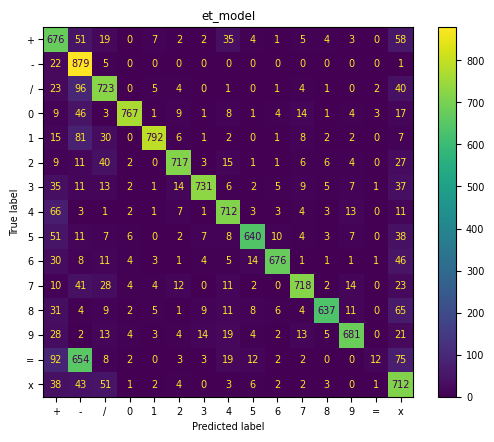

In [76]:
plt.rc('font' , size = 7)
ConfusionMatrixDisplay.from_predictions(fin_valid_label,et_pred)
plt.title("et_model")
plt.show()

------

In [42]:
start_time = time.time()
et_model.fit(fin_train,fin_train_label)
et_pred = et_model.predict(fin_valid)
end_time = time.time()
accuracy = accuracy_score(fin_valid_label, et_pred)
print(f"Extra Trees Accuracy: {accuracy}")
print(f"Extra Trees Training Time : {end_time - start_time} seconds")

Extra Trees Accuracy: 0.9490579204466155
Extra Trees Training Time : 103.21750450134277 seconds


In [43]:
#error 
start_time = time.time()
vot_model.fit(fin_train,fin_train_label)
vot_pred = vot_model.predict(fin_valid)
end_time = time.time()
accuracy = accuracy_score(fin_valid_label, vot_pred)
print(f"Voting clf Accuracy: {accuracy}")
print(f"Voting clf Training Time: {end_time - start_time} seconds")

C:\Users\user\anaconda3\envs\koreait2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\envs\koreait2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Voting clf Accuracy: 0.8735364813522525
Voting clf Training Time: 673.5969154834747 seconds


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn_clf.fit(fin_train,fin_train_label)
knn_pred = knn_clf.predict(fin_valid)
end_time = time.time()
accuracy = accuracy_score(fin_valid_label,knn_pred)
print(f"knn clf Accuracy: {accuracy}")
print(f"knn clf Training Time: {end_time-start_time} seconds")

knn clf Accuracy: 0.8715205086454214
knn clf Training Time: 21.7827787399292 seconds


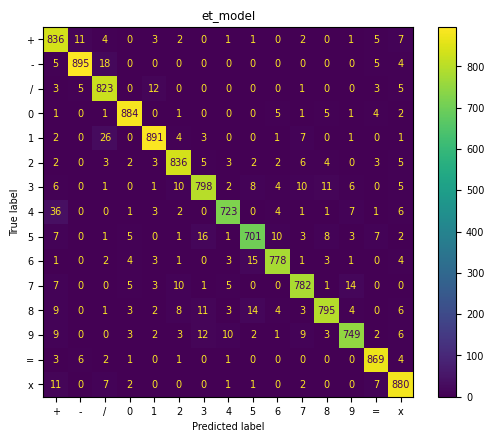

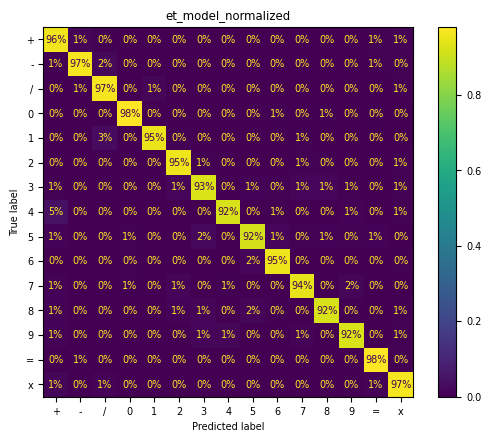

In [47]:
# Extra Tree Error analysis
plt.rc('font', size=7)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(fin_valid_label, et_pred)
plt.title("et_model")
plt.show()


plt.rc('font', size=7) 
ConfusionMatrixDisplay.from_predictions(fin_valid_label, et_pred, normalize="true", values_format=".0%")
plt.title("et_model_normalized")
plt.show()


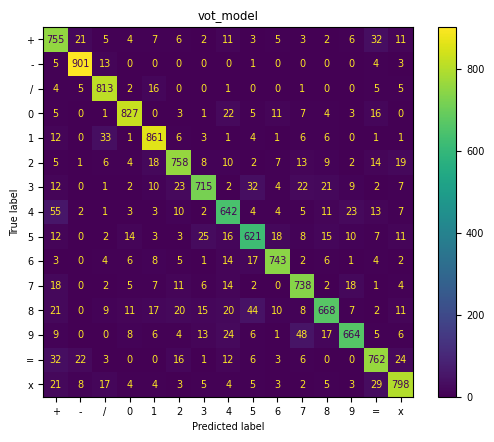

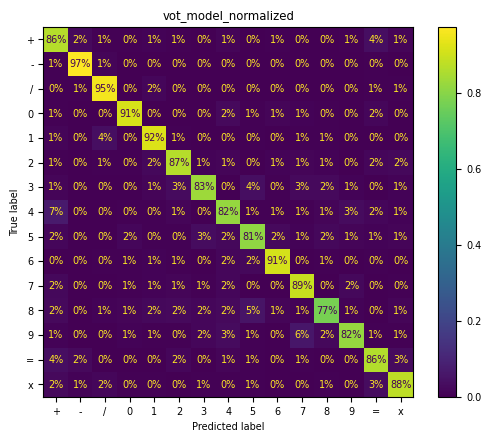

In [48]:
# Voting clf Error analysis
plt.rc('font', size=7)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(fin_valid_label, vot_pred)
plt.title("vot_model")
plt.show()

plt.rc('font', size=7) 
ConfusionMatrixDisplay.from_predictions(fin_valid_label, vot_pred, normalize="true", values_format=".0%")
plt.title("vot_model_normalized")
plt.show()

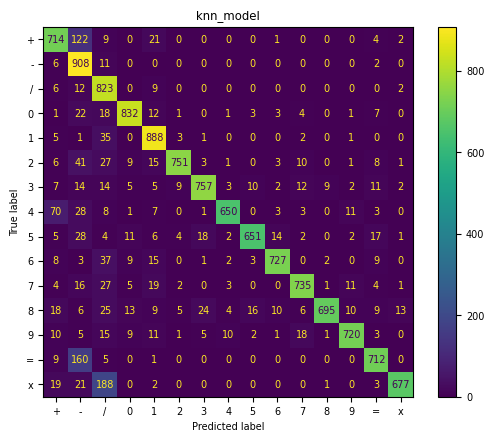

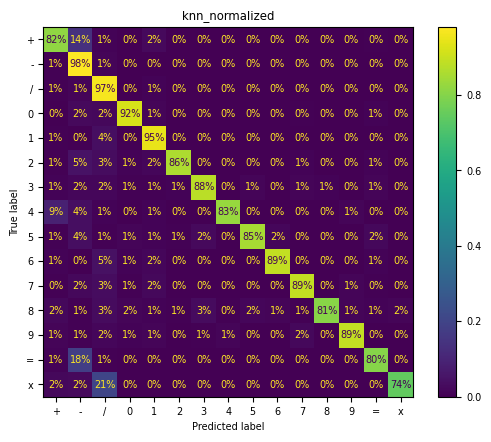

In [49]:
# Softmax Reg Error analysis
plt.rc('font', size=7)   # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(fin_valid_label, knn_pred)
plt.title("knn_model")
plt.show()

plt.rc('font', size=7) 
ConfusionMatrixDisplay.from_predictions(fin_valid_label, knn_pred, normalize="true", values_format=".0%")
plt.title("knn_normalized")
plt.show()

---
#### GridSearchCV를 이용한 최적의 parameter 

In [ ]:
# SSL error로 인해 코드 추가
import ssl; ssl._create_default_https_context = ssl._create_stdlib_context
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Grid Search를 위한 매개변수 범위 설정
param_grid = {
  'ex_clf__max_depth':[30,40,50], 'ex_clf__n_estimators':[500,1000,1500]}

# Grid Search 수행
grid_search = GridSearchCV(et_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(fin_train, fin_train_label)

# 최적의 매개변수 출력
print("Best Parameters:", grid_search.best_params_)

In [7]:
et_model_adv = Pipeline([('cnt_scr', CenterScaler()), ('pix_scr', PixelScaler()), 
                   ('ex_clf', ExtraTreesClassifier(n_estimators=1000, max_depth=30 ,random_state=42))])
start_time = time.time()
et_model_adv.fit(fin_train,fin_train_label)
et_pred_adv = et_model_adv.predict(fin_valid)
end_time = time.time()
accuracy_et_adv = accuracy_score(fin_valid_label, et_pred_adv)
print(f"Extra Trees Accuracy: {accuracy_et_adv}")
print(f"Extra Trees Training Time: {end_time - start_time} seconds")

Extra Trees Accuracy: 0.9485926959758083
Extra Trees Training Time: 455.576153755188 seconds


#### 최종모델 성능 확인 

In [6]:
et_model_adv = Pipeline([('cnt_scr', CenterScaler()), ('pix_scr', PixelScaler()), 
                   ('ex_clf', ExtraTreesClassifier(n_estimators=1000, max_depth=30 ,random_state=42))])
start_time = time.time()
et_model_adv.fit(X_train,y_train)
et_pred = et_model_adv.predict(X_test)
end_time = time.time()
accuracy_et = accuracy_score(y_test,et_pred)
print(f"Extra Trees MNIST Accuracy: {accuracy_et}")
print(f"Extra Trees MNIST Training time: {end_time-start_time}")

Extra Trees MNIST Accuracy: 0.9759
Extra Trees MNIST Training time: 232.67128014564514


In [8]:
fin_test = np.load("./FIN_test.npz")
fin_test_img = fin_test['img']
fin_test_label = fin_test['label']

In [9]:
permutation_test = np.random.permutation(len(fin_test_img))
fin_test_img = fin_test_img[permutation_test]
fin_test_label = fin_test_label[permutation_test]

In [13]:
start_time =time.time()
et_model_adv.fit(fin_train,fin_train_label)
et_pred = et_model_adv.predict(fin_test_img)
end_time = time.time()
accuracy = accuracy_score(fin_test_label,et_pred)
print(f"Extra Trees test accuracy: {accuracy}")
print(f"Extra Trees test Training time: {end_time-start_time}")

Extra Trees test accuracy: 0.8724735322425409
Extra Trees test Training time: 431.06891989707947


In [15]:
from sklearn.model_selection import learning_curve, KFold
import numpy as np
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 1.0, 5)

# KFold를 사용하여 3-폴드 교차 검증 객체 생성
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# X, y는 데이터, estimator는 사용할 모델, cv는 교차 검증 횟수
train_sizes, train_scores, validation_scores = learning_curve(
    et_model_adv, data_img, data_label, cv=cv, train_sizes=train_sizes)

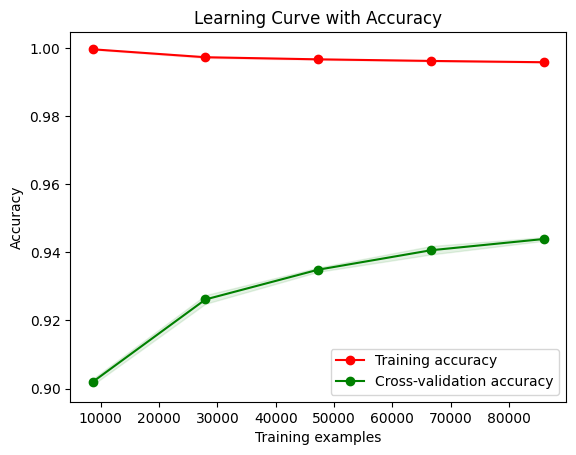

In [16]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# learning curve 그리기
plt.figure()
plt.title("Learning Curve with Accuracy")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    validation_scores_mean - validation_scores_std,
    validation_scores_mean + validation_scores_std,
    alpha=0.1,
    color="g",
)

plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training accuracy")
plt.plot(train_sizes, validation_scores_mean, "o-", color="g", label="Cross-validation accuracy")

plt.legend(loc="best")
plt.show()